# Overview of the data

 This car price prediction project is based on a dataset sourced from Code Alpha. The dataset 
 provides comprehensive information about used cars, covering both technical specifications and selling 
 details. It is designed to analyze key factors that influence a car’s resale value and to build a predictive 
 model for estimating car prices.

  **Dataset Features** 

* **Car_Name**:Indicates the brand and model of the car available in the dataset.
 
* **Year**:Represents the manufacturing year of the car, which helps determine the age of the vehicle.
 
* **Selling_Price**:The price at which the car is sold (target variable for prediction).
 
* **Present_Price**:The current market price of the car at the time of data collection.
 
* **Driven_kms**:Shows the total distance (in kilometers) the car has been driven, reflecting its usage level.
 
* **Fuel_Type**:Specifies the type of fuel used by the car (e.g., Petrol, Diesel, CNG).
 
* **Seller_Type**:Indicates whether the seller is a dealer or an individual owner.
 
* **Transmission**:Describes the transmission type of the car, either Manual or Automatic.
 
* **Owner**:Represents the number of previous owners of the car.

# Objectives of the data

 **1.Feature Analysis**:Analyze key car-related features such as brand goodwill, horsepower, mileage, fuel type, transmission, and ownership history, and identify the most relevant variables influencing car prices.

 **2.Model Development**:Train and evaluate a regression-based machine learning model to accurately predict car selling prices using the selected features.

 **3.Data Processing & Feature Engineering**:Perform data preprocessing tasks including handling missing values, encoding categorical variables, scaling numerical features, and creating new meaningful features to improve model performance.

 **4.Exploratory Data Analysis (EDA)**:Identify unique values within categorical features to better understand their distributions, classifications, and impact on car pricing.

 **5.Statistical Analysis**:Apply statistical techniques such as descriptive statistics, correlation analysis, and variance analysis to gain deeper insights into the dataset.

 **6.Data Visualization**:Use effective visualizations (bar charts, box plots, scatter plots, heatmaps, etc.) to understand data trends, relationships, and overall workflow.

 **7.Feature Importance Evaluation**:Analyze and interpret feature importance to determine which variables contribute most significantly to car price prediction.

 **8.Project Implementation & Validation**:Successfully implement, test, and validate the complete car price prediction pipeline to ensure accurate execution and reliable results.

In [5]:
# Importing all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
#Read csv file
df = pd.read_csv('D:\car data.csv')

In [7]:
#Check First 5 number of rows of the dataset.
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
#Check last number of rows of the dataset
df.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [9]:
#Dataset information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#Apply Data Preprocessing and Feature Engineering
print("--- 2. Data Preprocessing and Feature Engineering ---")

--- 2. Data Preprocessing and Feature Engineering ---


# Treat missing values

In [11]:
#Checking for missing values
print("Missing values before preprocessing:")
df.isnull().sum()

Missing values before preprocessing:


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
# Calculate the current year (assuming the current year is 2025 as per previous turns)
current_year = 2025

In [13]:
# Create a new feature 'Car_Age'
df['Car_Age'] = current_year - df['Year']

In [14]:
# Drop the original 'Year' column and 'Car_Name' column as they are not needed for the model
# 'Car_Name' is too specific and generally not useful for a generalized price prediction model
df = df.drop(['Year', 'Car_Name'], axis=1)

In [15]:
print("\nDataFrame after adding 'Car_Age' and dropping 'Year' and 'Car_Name':")
df.head()


DataFrame after adding 'Car_Age' and dropping 'Year' and 'Car_Name':


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [16]:
# Get unique values for categorical features to understand their categories
print("\nUnique values for 'Fuel_Type':", df['Fuel_Type'].unique())
print("Unique values for 'Selling_type':", df['Selling_type'].unique())
print("Unique values for 'Transmission':", df['Transmission'].unique())


Unique values for 'Fuel_Type': ['Petrol' 'Diesel' 'CNG']
Unique values for 'Selling_type': ['Dealer' 'Individual']
Unique values for 'Transmission': ['Manual' 'Automatic']


In [17]:
# Apply one-hot encoding to categorical features
# drop_first=True helps to avoid multicollinearity
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [18]:
# --- 3. Exploratory Data Analysis (Optional but Recommended) ---
# This part is not strictly required by the prompt, but it's good practice for understanding data
print("\nDataFrame after one-hot encoding:")
print(df.head())
print("-" * 40 + "\n")


DataFrame after one-hot encoding:
   Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       11             False   
1           4.75           9.54       43000      0       12              True   
2           7.25           9.85        6900      0        8             False   
3           2.85           4.15        5200      0       14             False   
4           4.60           6.87       42450      0       11              True   

   Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
0              True                    False                 True  
1             False                    False                 True  
2              True                    False                 True  
3              True                    False                 True  
4             False                    False                 True  
----------------------------------------



# Exploratory Data Analysis(EDA)-Visualization

In [19]:
# --- 3. Exploratory Data Analysis (Optional but Recommended) ---
# This part is not strictly required by the prompt, but it's good practice for understanding data
print("--- 3. Exploratory Data Analysis ---")
print("Statistical summary of numerical features:")
df.describe()

--- 3. Exploratory Data Analysis ---
Statistical summary of numerical features:


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,11.372093
std,5.082812,8.642584,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,7.000000
25%,0.900000,1.200000,15000.000000,0.000000,9.000000
50%,3.600000,6.400000,32000.000000,0.000000,11.000000
75%,6.000000,9.900000,48767.000000,0.000000,13.000000
max,35.000000,92.600000,500000.000000,3.000000,22.000000



Correlation matrix saved as 'correlation_matrix.png'.
----------------------------------------



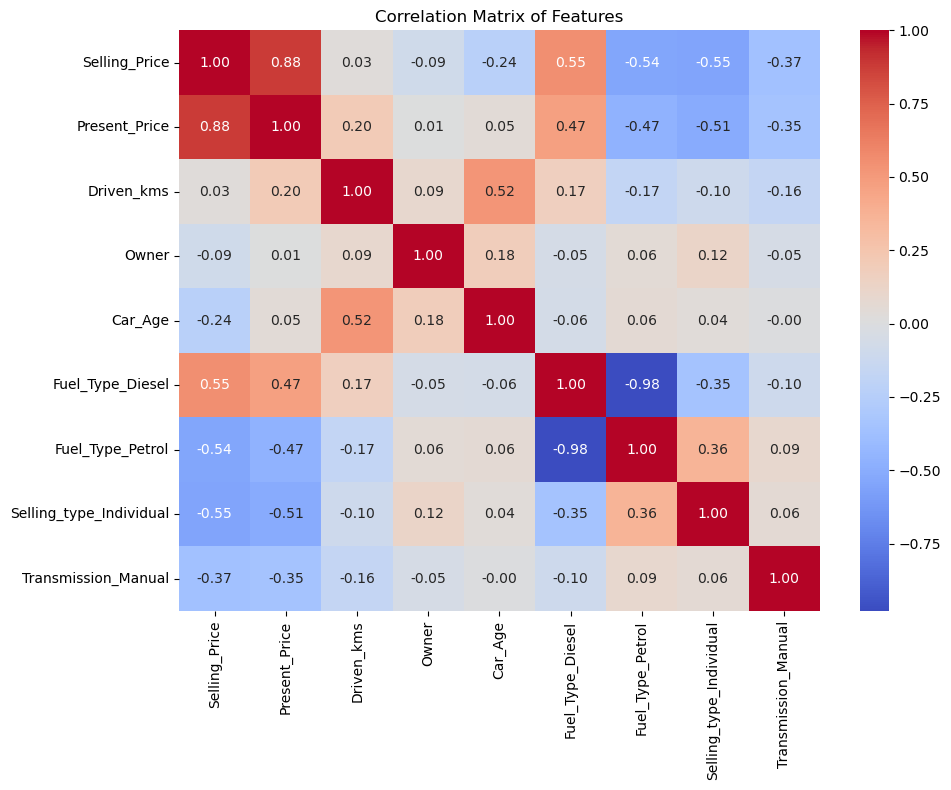

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
print("\nCorrelation matrix saved as 'correlation_matrix.png'.")
print("-" * 40 + "\n")


# Insights: Correlation matrix of features

**Strong Relationships**

**Selling_Price & Present_Price (0.88)**
→ Very strong positive correlation.
 Cars with a higher current market price tend to have a higher selling price.
**Most important predictor** for price.

**Factors that Reduce Selling Price**

* **Selling_Price & Car_Age (-0.24)**
→ Older cars generally sell for less.

* **Selling_Price & Driven_kms (0.03)**
→ Very weak relationship, meaning mileage alone doesn’t strongly affect price here.

* **Selling_Price & Transmission_Manual (-0.37)**
→ Manual cars are usually priced lower than automatic ones.

* **Selling_Price & Selling_type_Individual (-0.55)**
→ Cars sold by individuals are cheaper than dealer-sold cars.

**Fuel Type Insights**

* **Fuel_Type_Diesel & Fuel_Type_Petrol (-0.98)**
→ Strong negative correlation (expected, since a car can’t be both).

* **Selling_Price & Fuel_Type_Diesel (0.55)**
→ Diesel cars tend to have higher selling prices.

* **Selling_Price & Fuel_Type_Petrol (-0.54)**
→ Petrol cars are generally cheaper compared to diesel.

**Usage & Age**

* **Driven_kms & Car_Age (0.52)**
→ Older cars usually have higher mileage, which makes sense logically.

 
**Ownership Effect**

* **Owner vs Selling_Price (-0.09)**
→ Very weak negative impact.
 Number of owners slightly affects price but not significantly.

# Conclusion of the Insight
* **Most influential features for predicting Selling Price:**

    **1**.Present_Price

    **2**.Fuel_Type

    **3**.Selling_Type

    **4**.Transmission

    **5**.Car_Age

* **Low-impact features**: Owner, Driven_kms (in this dataset)

This heatmap is excellent for feature selection before building a machine learning model

In [21]:
# --- 4. Model Training ---
print("--- 4. Model Training ---")

--- 4. Model Training ---


In [22]:
# Define features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [23]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Display Training features shape 
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (240, 8)
Testing features shape: (61, 8)
Training target shape: (240,)
Testing target shape: (61,)


In [35]:
# Initialize and train the Random Forest Regressor model
# n_estimators: The number of trees in the forest.
# random_state: Controls the randomness of the estimator.
model = RandomForestRegressor(n_estimators=100, random_state=42)
print("\nTraining the RandomForestRegressor model...")
model.fit(X_train, y_train)
y_pred=model.predict(X_test,)
print("Model training complete.")
print("-" * 40 + "\n")


Training the RandomForestRegressor model...
Model training complete.
----------------------------------------



In [26]:
# --- 5. Model Evaluation ---
print("--- 5. Model Evaluation ---")

--- 5. Model Evaluation ---


In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [28]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [32]:
#Display mean absolute error and root mean sqpareed error
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("-" * 40 + "\n")

Mean Absolute Error (MAE): 0.64
Mean Squared Error (MSE): 0.93
Root Mean Squared Error (RMSE): 0.97
R-squared (R2): 0.96
----------------------------------------



In [30]:
# --- 6. Visualize Results ---
print("--- 6. Visualizing Results ---")

--- 6. Visualizing Results ---


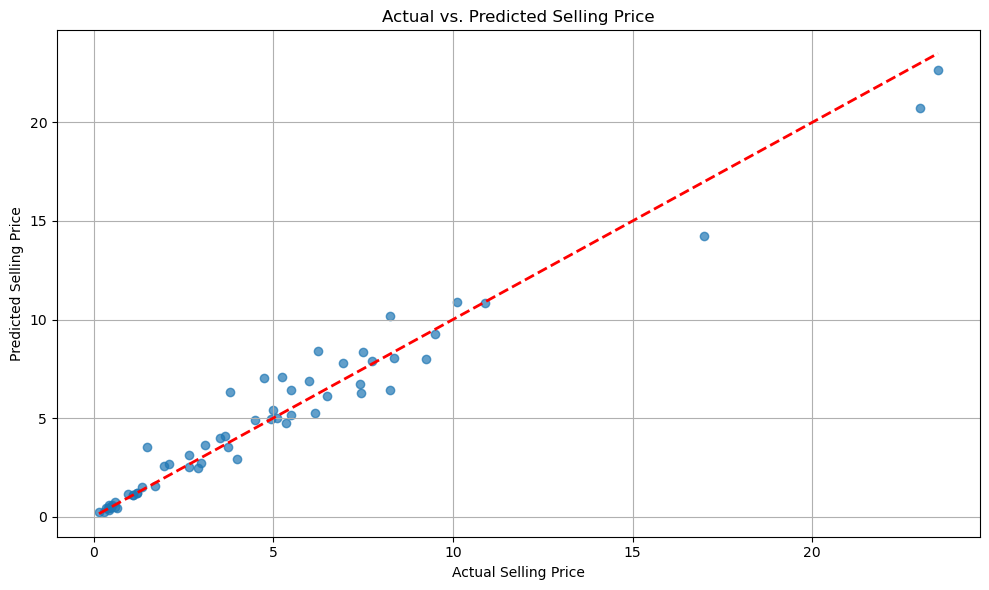

In [31]:
#Visualize the actual vs predicted selling Price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
# Plotting the ideal line where actual equals predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Price")
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted_selling_price.png')
plt.show()  #Display the plot

# Insights: Actual VS Predicted Selling Price

 **Overall Model Performance**

* Most data points lie **close to the red dashed diagonal line** (ideal prediction line).

* This indicates the model’s predictions are **highly aligned with actual selling prices.**

* The model has **good accuracy and strong predictive power.**

 **Error Distribution**

 **Low-price cars (₹0–3 lakhs)**

* Predictions are very accurate with **minimal error.**

 **Mid-range cars (₹4–10 lakhs)**
 
* Slight dispersion around the line, suggesting **small prediction errors**, which is normal.

 **High-price cars (₹15+ lakhs)**

* A few points deviate from the line, indicating **underprediction or overprediction** at higher values.

 **Bias Observation**

* No strong systematic bias is visible.

* However, for **very expensive cars**, the model tends to **slightly underpredict**, possibly due to fewer high-price samples in the training data.

 **Model Reliability**

* The linear trend suggests the model captures the **true relationship** between features and selling price.

* Residual errors appear **random**, which is a good sign (no clear pattern left to learn).

# Conclusion of the project

* The model performs **well across most price ranges.**

* Prediction accuracy is **highest for low and mid-priced vehicles.**

* Performance on **high-priced cars can be improved** by adding more data or using advanced models (e.g., Random Forest, XGBoost).

In [2]:
#Predict Actual vs predicted selling price
print("Actual vs. Predicted Selling Price plot saved as 'actual_vs_predicted_selling_price.png'.")
print("-" * 40 + "\n")

Actual vs. Predicted Selling Price plot saved as 'actual_vs_predicted_selling_price.png'.
----------------------------------------



In [33]:
# --- 7. Feature Importance (Optional) ---
# This helps to understand which features contributed most to the predictions
print("--- 7. Feature Importance ---")
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importances)

--- 7. Feature Importance ---

Feature Importances:
Present_Price              0.881166
Car_Age                    0.059495
Driven_kms                 0.040265
Transmission_Manual        0.009646
Fuel_Type_Diesel           0.004339
Fuel_Type_Petrol           0.002564
Selling_type_Individual    0.002155
Owner                      0.000370
dtype: float64


C:\Users\Welcome\AppData\Local\Temp\ipykernel_18844\4285404943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


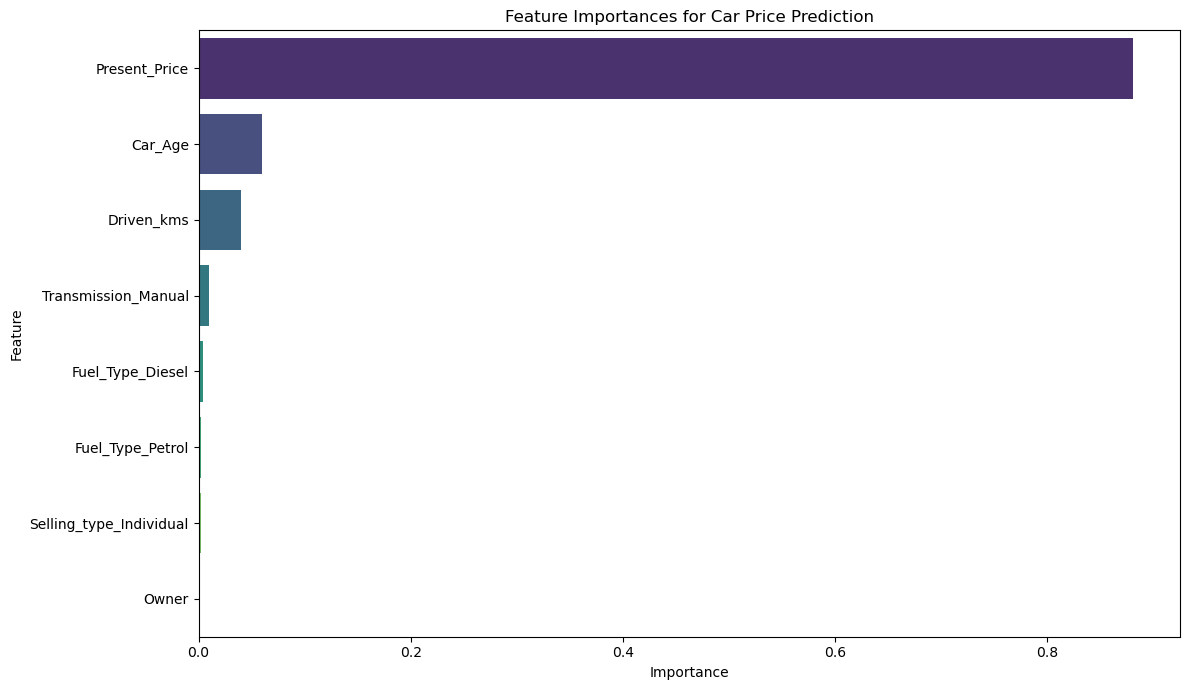

Feature importances plot saved as 'feature_importances.png'.
----------------------------------------



In [35]:
#Implementing a bargraph feature Importance for Car Price Prediction
plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances for Car Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()
print("Feature importances plot saved as 'feature_importances.png'.")
print("-" * 40 + "\n")

# Insights: Feature Importance for Car Price Prediction

**Most Influential Feature**

* **Present_Price (~0.88–0.90 importance)**
    
    * This feature dominates the model.
    
    * The current market price of the car is the **strongest predictor** of its selling price.
    
    * Confirms the strong correlation seen earlier in the heatmap.

* **Moderate Influence Features**

    * Car_Age
      Older cars reduce the selling price.
      Plays the **second most important** role, but far less than Present_Price.

    * Driven_kms
      Mileage has a **noticeable but limited impact.**
      Higher kilometers generally reduce car value.

* **Low Impact Features**

    * Transmission_Manual
      Manual cars slightly affect price, but impact is minimal.

    * Fuel_Type (Diesel / Petrol)
      Contributes very little once Present_Price is considered.

    * Selling_type_Individual
      Minor influence compared to dealer sales.

    * Owner
      Least important feature in the model.

* **Overall Interpretation**

    * The model is **highly dependent on Present_Price.**

    * Other features provide **incremental improvements,** but none come close.

    * This indicates **low multicollinearity issues** after feature selection.

# Conclusion of the Insight
The selling price of a used car is primarily determined by its present market value, while factors such as age, mileage, fuel type, ownership, and transmission have comparatively smaller influence.

In [1]:
#Finalize the projects
print("Project execution complete!")

Project execution complete!
